In [ ]:
import tensorflow as tf

In [1]:
from tensorflow import keras

SyntaxError: invalid character in identifier (<ipython-input-1-66b444d816b6>, line 1)

In [12]:
#python -m pip install keras
#sudo python -m pip install --user tensorflow

SyntaxError: invalid syntax (<ipython-input-12-52a5a293ab76>, line 1)

In [2]:
# Dependencies
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 


img_width, img_height = 224, 224

ModuleNotFoundError: No module named 'keras'

In [2]:
train_data_dir = 'input/dogs-cats-images/dataset/training_set'
validation_data_dir = 'input/dogs-cats-images/dataset/test_set'
nb_train_samples =8000
nb_validation_samples = 2000
epochs = 10
batch_size = 16


In [3]:
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 


In [4]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 


In [5]:
model.compile(loss='binary_crossentropy', 
			optimizer='rmsprop', 
			metrics=['accuracy']) 


In [7]:
train_datagen = ImageDataGenerator( 
	rescale=1. / 255, 
	shear_range=0.2, 
	zoom_range=0.2, 
	horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_data_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_data_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

model.fit( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size) 


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
500/500 [==============================] - 448s 895ms/step - loss: 0.6698 - accuracy: 0.6102 - val_loss: 0.5929 - val_accuracy: 0.6930
Epoch 2/10
500/500 [==============================] - 439s 877ms/step - loss: 0.6002 - accuracy: 0.6839 - val_loss: 0.5586 - val_accuracy: 0.7205
Epoch 3/10
500/500 [==============================] - 410s 821ms/step - loss: 0.5688 - accuracy: 0.7128 - val_loss: 0.5492 - val_accuracy: 0.7450
Epoch 4/10
500/500 [==============================] - 403s 806ms/step - loss: 0.5487 - accuracy: 0.7318 - val_loss: 0.5399 - val_accuracy: 0.7465
Epoch 5/10
500/500 [==============================] - 409s 817ms/step - loss: 0.5339 - accuracy: 0.7446 - val_loss: 0.5309 - val_accuracy: 0.7595
Epoch 6/10
500/500 [==============================] - 350s 699ms/step - loss: 0.5200 - accuracy: 0.7501 - val_loss: 0.5838 - val_accuracy: 0.7545
Epoch 7/10
500/500 [====================

In [8]:
model.save('model_cat_dog.h5') 

In [9]:
# Evaluate the model using the training data
model_loss, model_accuracy = model.evaluate(validation_generator, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

125/125 - 12s - loss: 0.4811 - accuracy: 0.7715
Loss: 0.48113521933555603, Accuracy: 0.7714999914169312


In [10]:
# Load the model
from tensorflow.keras.models import load_model
model_path = 'C:/Users/tgokh/Documents/Final-Project/model_cat_dog.h5'
modelx = load_model(model_path)

In [11]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('model_cat_dog.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('input/dogs-cats-images/dataset/test_set/dogs/dog.4501.jpg')
img = cv2.resize(img,(224, 224))
img = np.reshape(img,[1,224, 224,3])

classes = model.predict_classes(img)

print(classes)

C:\Users\tgokh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1]]


In [12]:
classes = train_generator.class_indices    
print(classes)

{'cats': 0, 'dogs': 1}


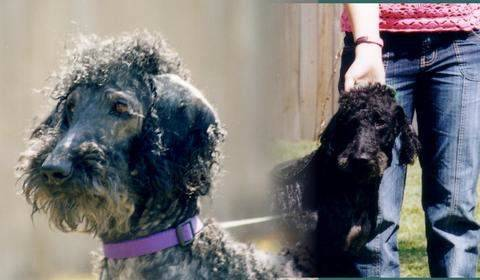

In [13]:
from IPython.display import display, Image
display(Image(filename='input/dogs-cats-images/dataset/test_set/dogs/dog.4501.jpg'))